# Cheap Beer Challenge

Having a beer and watching a game with friends we wondered, whether we could tell apart the cheap beers we detest from the cheap beers we deem drinkable. So eight of us took the challenge:

![WTF](data/beer_challenge.jpg)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
beer_challenge = pd.read_csv('data/beer_challenge.csv', index_col=0, header=[0, 1])

pd.set_option('display.max_columns', None)
beer_challenge

Cheese                                  \
                        Expectation Rating                    Guess   
Anker                             1      1                 Heineken   
Chopfab                           2      2                   Junker   
Corona                            3      3                   Corona   
Feldschlösschen                   1      1                    Anker   
Feldschlösschen Premium           2      1          Feldschlösschen   
Heineken                          1      1                Rugenbräu   
Junker                            2      2                  Chopfab   
Prix Garantie                     2      2              Quöllfrisch   
Quöllfrisch                       3      1            Prix Garantie   
Rugenbräu                         2      2  Feldschlösschen Premium   

                               Geri                                  \
                        Expectation Rating                    Guess   
Anker                             3      1  Feldschlösschen Premium   
Chopfab                           2      2                   Corona   
Corona                            2      1                    Anker   
Feldschlösschen                   1      3                   Junker   
Feldschlösschen Premium           1      2                Rugenbräu   
Heineken                          1      1          Feldschlösschen   
Junker                            3      2              Quöllfrisch   
Prix Garantie                     1      1            Prix Garantie   
Quöllfrisch                       3      1                  Chopfab   
Rugenbräu                         2      1                 Heineken   

                               Lilä                                  \
                        Expectation Rating                    Guess   
Anker                             1      1            Prix Garantie   
Chopfab                           1      2                  Chopfab   
Corona                            2      2  Feldschlösschen Premium   
Feldschlösschen                   2      3              Quöllfrisch   
Feldschlösschen Premium           2      1                    Anker   
Heineken                          2      2          Feldschlösschen   
Junker                            2      3                Rugenbräu   
Prix Garantie                     1      2                 Heineken   
Quöllfrisch                       3      2                   Corona   
Rugenbräu                         3      2                   Junker   

                               Lüku                                  \
                        Expectation Rating                    Guess   
Anker                             2      3  Feldschlösschen Premium   
Chopfab                           3      3                   Copfab   
Corona                            2      2                Rugenbräu   
Feldschlösschen                   3      3                   Junker   
Feldschlösschen Premium           2      1                    Anker   
Heineken                          1      1                   Corona   
Junker                            3      1              Quöllfrisch   
Prix Garantie                     2      2                 Heineken   
Quöllfrisch                       1      1            Prix Garantie   
Rugenbräu                         2      3          Feldschlösschen   

                              Michu                                  \
                        Expectation Rating                    Guess   
Anker                             1      1                 Heineken   
Chopfab                           3      3                  Chopfab   
Corona                            2      2                   Corona   
Feldschlösschen                   1      1            Prix Garantie   
Feldschlösschen Premium           2      2                    Anker   
Heineken                          1      1              Quöllfrisch   
Junker                            3      1  Felds

In [3]:
beer_challenge.xs("Guess", level=1, axis=1).apply(
    lambda guess: sum(guess == guess.index)
).sort_values(ascending=False)

Nesa      3
Michu     2
Steff     1
Ste       1
Lilä      1
Geri      1
Cheese    1
Lüku      0
dtype: int64

In [4]:
n_samples = 10000
samples = np.array(
    [
        [
            np.random.choice(np.arange(10), 10, replace=False) == np.arange(10)
            for _ in range(8)
        ]
        for _ in range(n_samples)
    ]
)

for i in range(1, 6):
    worse = sum(samples.sum(axis=2).flatten() < i)
    print(f"Prob. of less than {i} at random: {worse / n_samples / 8}")

Prob. of less than 1 at random: 0.3694125
Prob. of less than 2 at random: 0.73555
Prob. of less than 3 at random: 0.91965
Prob. of less than 4 at random: 0.9812125
Prob. of less than 5 at random: 0.9964625


In [5]:
worse_than_nesa = (samples.sum(axis=2) <= 2).all(axis=1)
sum(worse_than_nesa) / n_samples

0.51400000000000001

In [6]:
beer_challenge.xs("Guess", level=1, axis=1).apply(
    lambda beer: sum(beer == beer.name), axis=1
).sort_values(ascending=False)

Corona                     3
Chopfab                    3
Quöllfrisch                1
Prix Garantie              1
Feldschlösschen Premium    1
Anker                      1
Rugenbräu                  0
Junker                     0
Heineken                   0
Feldschlösschen            0
dtype: int64

In [7]:
less_than_two_with_three = (samples.sum(axis=1) >= 3).sum(axis=1) < 2
sum(less_than_two_with_three) / n_samples

0.94450000000000001

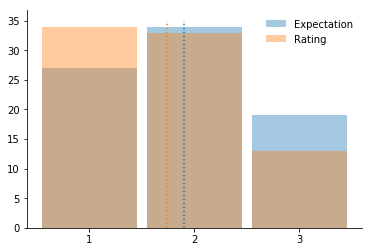

In [8]:
bins = [0.55, 1.45, 1.55, 2.45, 2.55, 3.45]
for i, label in enumerate(['Expectation', 'Rating']):
    stars = beer_challenge.loc[:, (slice(None), label)].values.flatten()
    sns.distplot(stars, bins=bins, kde=False, label=label)
    plt.vlines(stars.mean(), 0, 35, color=f"C{i}", linestyles=":")
plt.legend(frameon=False)
plt.xticks([1, 2, 3])
sns.despine()
plt.show()